In [1]:
import numpy as np
import pandas as pd

import yfinance as yf
import pandas_datareader

from datetime import datetime
from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('fivethirtyeight')
# style.use('ggplot')
style.use('seaborn')
%matplotlib inline

In [2]:
df_topix30 = pd.read_csv("../data/tse_topixcore30_20201030.csv")
df_topix30.head()

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
0,20201030,3382,セブン＆アイ・ホールディングス,市場第一部（内国株）,6100,小売業,14,小売,1,TOPIX Core30
1,20201030,4063,信越化学工業,市場第一部（内国株）,3200,化学,4,素材・化学,1,TOPIX Core30
2,20201030,4452,花王,市場第一部（内国株）,3200,化学,4,素材・化学,1,TOPIX Core30
3,20201030,4502,武田薬品工業,市場第一部（内国株）,3250,医薬品,5,医薬品,1,TOPIX Core30
4,20201030,4503,アステラス製薬,市場第一部（内国株）,3250,医薬品,5,医薬品,1,TOPIX Core30


In [3]:
stocks_topix30 = df_topix30['コード'].values
stocks_topix30

array([3382, 4063, 4452, 4502, 4503, 4568, 6098, 6367, 6501, 6594, 6758,
       6861, 6954, 6981, 7203, 7267, 7741, 7974, 8001, 8031, 8058, 8306,
       8316, 8411, 8766, 9022, 9432, 9433, 9437, 9984])

In [4]:
# st = '2015/1/1' # st = datetime(2015, 10, 30)
# ed = '2019/12/31' # ed = datetime(2020, 10, 30)

st = '2015/1/1'
ed = '2019/12/31'

symbols =  [str(s)+'.T' for s in stocks_topix30]
# symbols.append('^N225')
# symbols.append('TOPIX')

dfs = []
for symbol in symbols:
    df = pandas_datareader.data.DataReader(symbol, 'yahoo', st, ed) # daily
    df = df.resample('M').mean() # monthly
    df = df.sort_values(by='Date', ascending=True)
    df = df.fillna(method='ffill') # 1つ前の行の値で埋める
    df = df[['Close']].rename(columns={'Close': symbol})
    dfs.append(df)

df = pd.concat(dfs, axis=1)

In [5]:
display(df.head(3))
display(df.tail(3))

,3382.T,4063.T,4452.T,4502.T,4503.T,4568.T,6098.T,6367.T,6501.T,6594.T,...,8058.T,8306.T,8316.T,8411.T,8766.T,9022.T,9432.T,9433.T,9437.T,9984.T
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,4264.026316,7796.473684,4922.552632,5376.500000,1765.578947,543.622790,1165.877371,7944.894737,4453.394737,7935.368421,...,2096.421053,626.931573,4082.763158,1966.105263,3912.789474,18732.894737,1634.184211,2639.404194,1906.157895,3550.736842
2015-02-28,4474.894737,8035.157895,5135.842105,6008.947368,1845.421053,606.850792,1192.368421,7856.000000,4074.578947,8141.157895,...,2270.552632,713.821055,4370.131579,2070.052632,4197.105263,21143.684211,1807.618421,2659.034231,2067.105263,3552.631579
2015-03-31,4874.477273,8089.727273,5783.545455,6348.727273,1985.931818,649.916637,1254.470004,7888.227273,4092.977273,7920.863636,...,2438.477273,772.790907,4765.159091,2201.909091,4461.318182,23104.772727,1869.068182,2718.158203,2195.522727,3516.977273


,3382.T,4063.T,4452.T,4502.T,4503.T,4568.T,6098.T,6367.T,6501.T,6594.T,...,8058.T,8306.T,8316.T,8411.T,8766.T,9022.T,9432.T,9433.T,9437.T,9984.T
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-31,4210.428571,11786.904762,8246.523810,3776.285714,1653.666667,2251.190941,3475.857143,14549.285714,4106.380952,15001.190476,...,2685.642857,550.809527,3743.333333,1653.000000,5709.857143,22580.714286,2665.809524,2951.571429,2854.642857,4171.523810
2019-11-30,4164.550000,11925.750000,8550.750000,4387.400000,1832.050000,2263.750488,3840.800000,15508.750000,4167.850000,16198.000000,...,2845.275000,579.955005,3985.600000,1703.650000,5918.250000,22470.000000,2747.450000,3169.050000,3004.750000,4256.800000
2019-12-31,4059.761905,12003.095238,8933.857143,4409.904762,1873.404762,2391.223307,4062.761905,15679.047619,4413.857143,15568.333333,...,2918.071429,590.247620,4037.190476,1693.714286,6122.142857,22115.000000,2790.333333,3222.666667,3029.785714,4472.428571


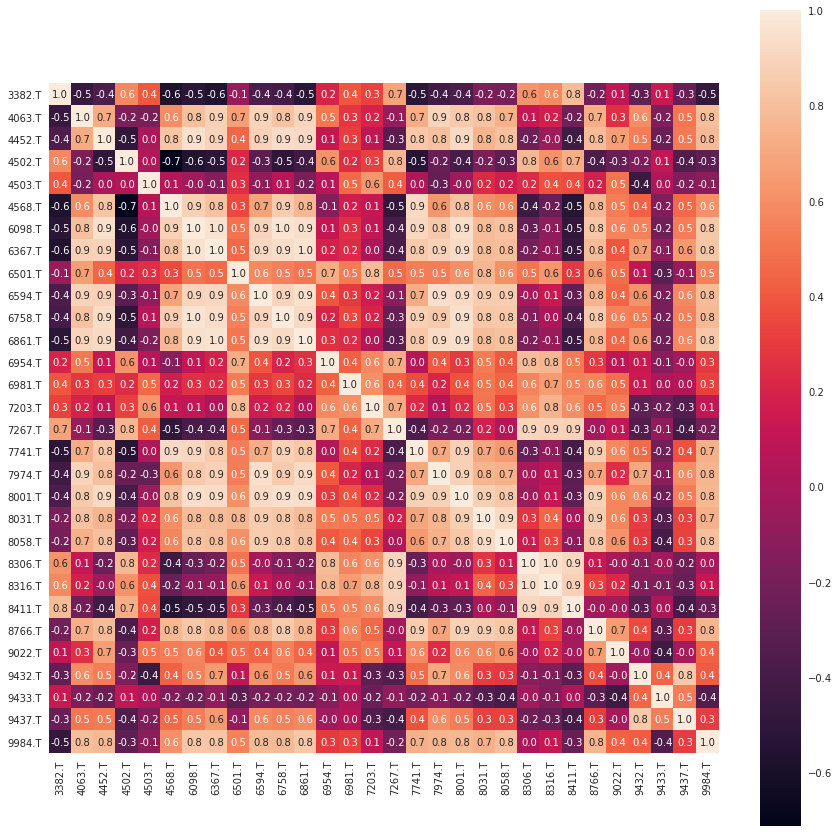

In [6]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f')
plt.show()

In [9]:
def calc_returns(df):
    """
    calculate cumulative returns
    """
    df = df.fillna(method='ffill').dropna()

    # 収益率(returns change)
    df_retchg = df.pct_change()
    
    # 累積収益率 (cumulative returns)
    df_retcum = (1 + df_retchg).cumprod()
    df_retcum = df_retcum.fillna(1.0) # 最初の行を1.0に直す
    
    return df_retcum, df_retchg

In [10]:
df_retcum, df_retchg = calc_returns(df)

display(df_retchg.head(3))
display(df_retchg.tail(3))

,3382.T,4063.T,4452.T,4502.T,4503.T,4568.T,6098.T,6367.T,6501.T,6594.T,...,8058.T,8306.T,8316.T,8411.T,8766.T,9022.T,9432.T,9433.T,9437.T,9984.T
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,0.049453,0.030614,0.043329,0.117632,0.045221,0.116309,0.022722,-0.011189,-0.085062,0.025933,...,0.083061,0.138595,0.070386,0.052870,0.072663,0.128693,0.106129,0.007437,0.084435,0.000534
2015-03-31,0.089294,0.006791,0.126114,0.056546,0.076140,0.070966,0.052083,0.004102,0.004515,-0.027059,...,0.073958,0.082612,0.090393,0.063697,0.062951,0.092751,0.033995,0.022235,0.062124,-0.010036


,3382.T,4063.T,4452.T,4502.T,4503.T,4568.T,6098.T,6367.T,6501.T,6594.T,...,8058.T,8306.T,8316.T,8411.T,8766.T,9022.T,9432.T,9433.T,9437.T,9984.T
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-31,0.042960,0.029448,0.048713,0.008552,0.079306,-0.027674,0.063467,0.039743,0.027934,0.032130,...,-0.013395,0.004876,0.016294,0.004317,-0.010595,0.041786,0.022135,0.030132,0.030714,-0.096527
2019-11-30,-0.010896,0.011780,0.036891,0.161829,0.107871,0.005579,0.104994,0.065946,0.014969,0.079781,...,0.059439,0.052914,0.064720,0.030641,0.036497,-0.004903,0.030625,0.073682,0.052584,0.020442
2019-12-31,-0.025162,0.006486,0.044804,0.005129,0.022573,0.056310,0.057791,0.010981,0.059025,-0.038873,...,0.025585,0.017747,0.012944,-0.005832,0.034452,-0.015799,0.015608,0.016919,0.008332,0.050655


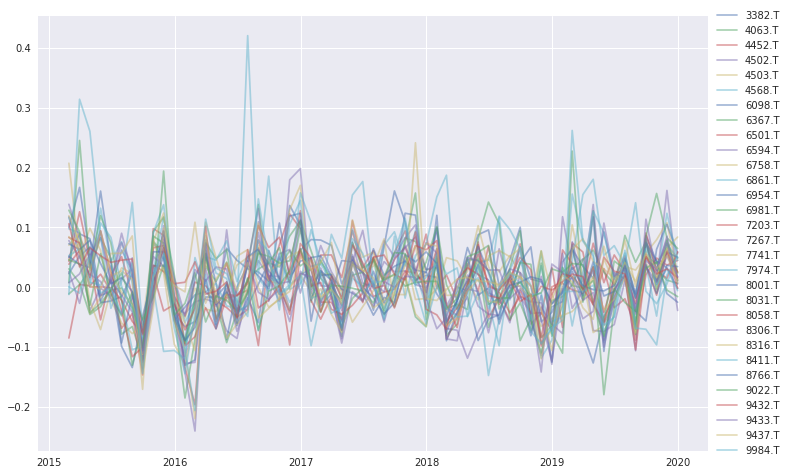

In [11]:
plt.figure(figsize=(12, 8))
for idx, col in enumerate(df.columns):
    plt.plot(df_retchg.index, df_retchg[col], label=col, alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

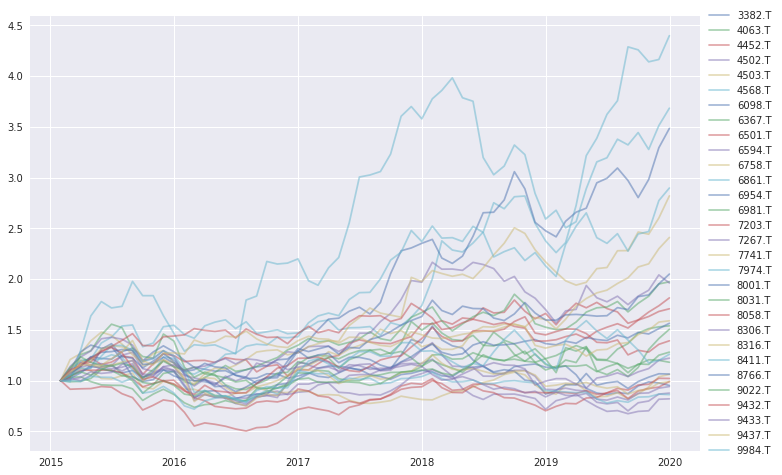

In [12]:
plt.figure(figsize=(12, 8))
for idx, col in enumerate(df.columns):
    plt.plot(df_retcum.index, df_retcum[col], label=col, alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

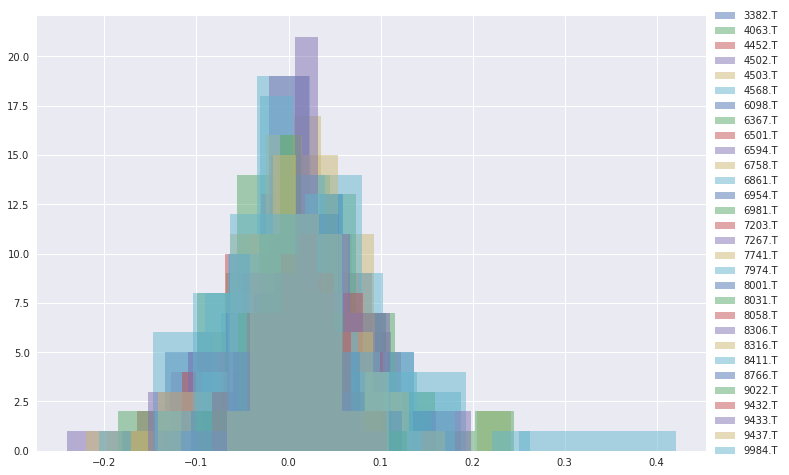

In [13]:
plt.figure(figsize=(12, 8))
for idx, col in enumerate(df.columns):
    plt.hist(df_retchg[[col]], label=col, alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

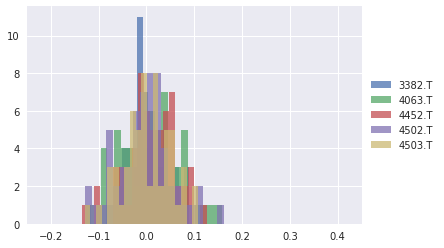

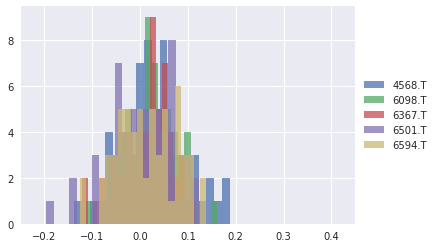

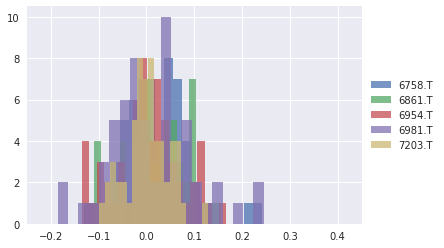

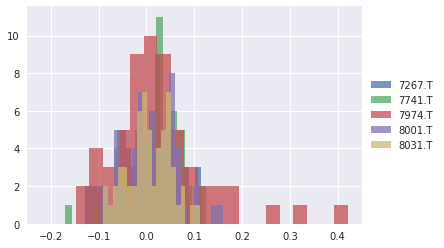

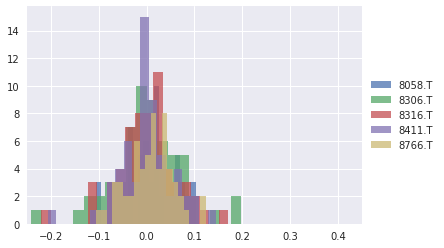

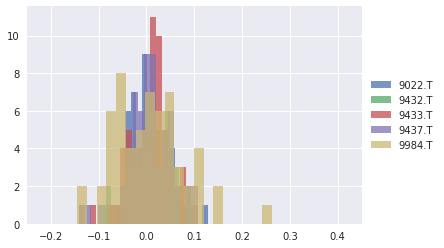

In [14]:
for idx, col in enumerate(df.columns):
    plt.hist(df_retchg[[col]].values, bins=20, label=col, alpha=0.75)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.xlim([-0.25, 0.45])
    if (idx + 1) % 5 == 0:
        plt.show()

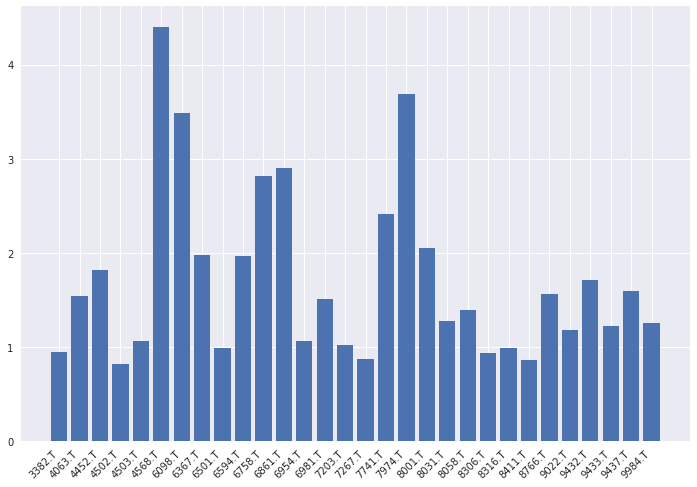

In [15]:
# cumulative returns
plt.figure(figsize=(12,8))
plt.bar(df_retchg.columns, df_retcum.iloc[-1].values)
plt.xticks(rotation=45, ha='right')
plt.show()

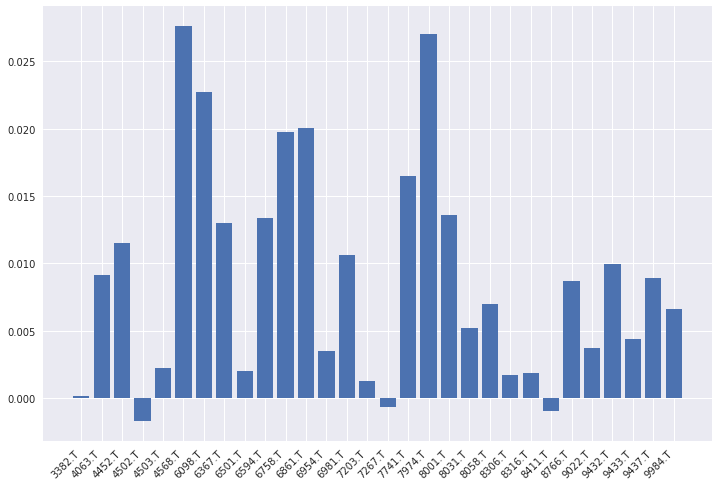

In [16]:
# expected returns
plt.figure(figsize=(12,8))
plt.bar(df_retcum.columns, df_retchg.mean().values)
plt.xticks(rotation=45, ha='right')
plt.show()

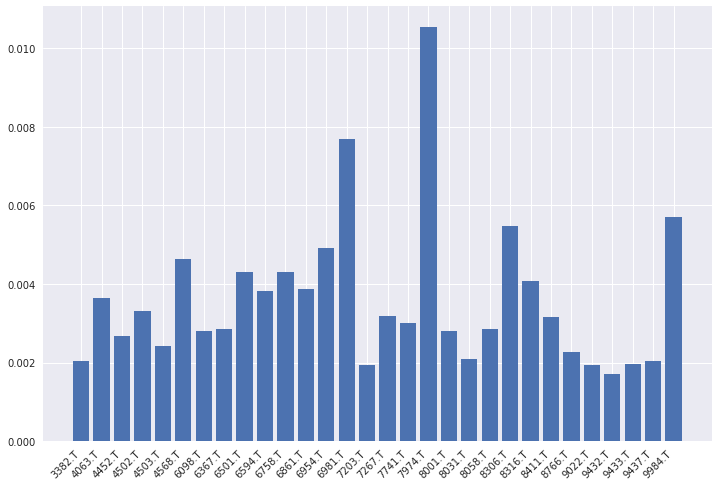

In [17]:
# variance
plt.figure(figsize=(12,8))
plt.bar(df_retcum.columns, df_retchg.var().values)
plt.xticks(rotation=45, ha='right')
plt.show()

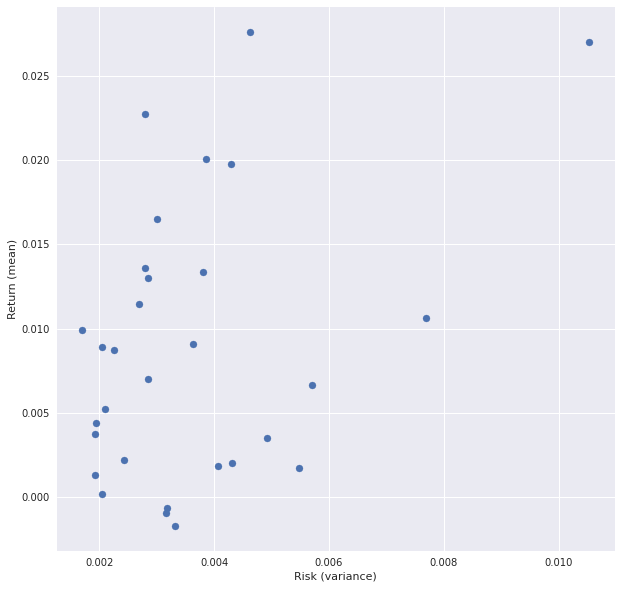

In [18]:
# returns vs risk (change)
plt.figure(figsize=(10,10))
mean = df_retchg.mean().values
var = df_retchg.var().values
plt.scatter(var, mean)
plt.xlabel("Risk (variance)")
plt.ylabel("Return (mean)")
plt.show()

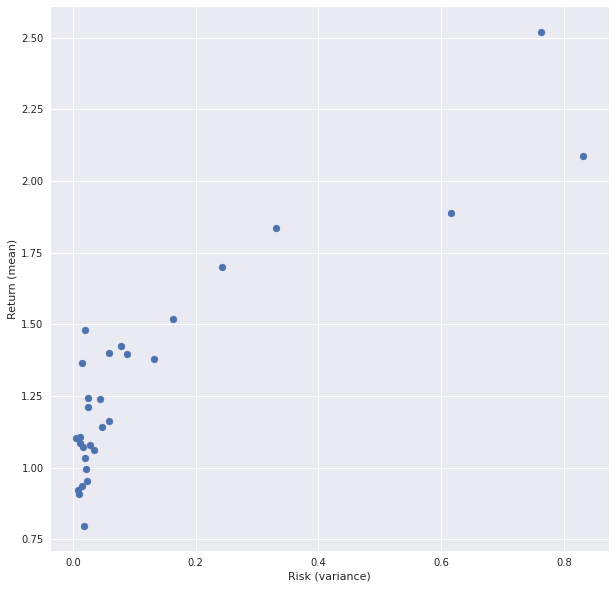

In [19]:
# returns vs risk (cumulative)
plt.figure(figsize=(10,10))
mean = df_retcum.mean().values
var = df_retcum.var().values
plt.scatter(var, mean)
plt.xlabel("Risk (variance)")
plt.ylabel("Return (mean)")
plt.show()

### ポートフォリオ選択モデル

Markowitzの平均分散モデル

- $\Sigma  \in \mathbb{R}^{n \times n}$: 共分散行列
- $r  \in \mathbb{R}^{n}$: 期待収益率ベクトル
- $r_i \in \mathbb{R}$: 資産$i$の期待収益率
- $r_e \in \mathbb{R}$: 投資家の要求期待収益率
- $x \in \mathbb{R}^{n}$: 投資比率ベクトル
- $x_i \in \mathbb{R}$: 資産$i$の投資比率


$$
\begin{align}
{\rm min} ~~~ x^T \Sigma x \\
{\rm s.t.} ~~~ r^T x \geq r_e \\
{\| x \|}_{1} = 1 \\
x_i \geq 0
\end{align}
$$

*二次計画問題

![img0](https://cdn-ak.f.st-hatena.com/images/fotolife/m/meison_amsl/20161016/20161016122314.png)


参考:
- https://cvxopt.org/userguide/coneprog.html
- https://qiita.com/ryoshi81/items/8b0c6add3e367f94c828

In [20]:
import cvxopt

def cvxopt_qp_solver(r, r_e, cov):
    # CVXOPT QP Solver for Markowitz' Mean-Variance Model
    # See https://cvxopt.org/userguide/coneprog.html#quadratic-programming
    # See https://cdn.hackaday.io/files/277521187341568/art-mpt.pdf
    n = len(r)
    r = cvxopt.matrix(r)
    
    P = cvxopt.matrix(2.0 * np.array(cov))
    q = cvxopt.matrix(np.zeros((n, 1)))
    G = cvxopt.matrix(np.concatenate((-np.transpose(r), -np.identity(n)), 0))
    h = cvxopt.matrix(np.concatenate((-np.ones((1,1)) * r_e, np.zeros((n,1))), 0))
    A = cvxopt.matrix(1.0, (1, n))
    b = cvxopt.matrix(1.0)    
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    return sol

In [21]:
r = df_retchg.mean().values
r_e = 0.01
cov = np.array(df_retcum.cov())

sol = cvxopt_qp_solver(r, r_e, cov)
x_opt = np.squeeze(np.array(sol['x']))
print(x_opt)
print("min var (opt) :", sol["primal objective"])
print("r_e           :", r_e)

     pcost       dcost       gap    pres   dres
 0:  5.9597e-03 -1.0016e+00  3e+01  6e+00  6e+00
 1:  1.4851e-02 -9.3071e-01  1e+00  8e-02  8e-02
 2:  1.7433e-02 -2.9961e-01  4e-01  2e-02  2e-02
 3:  4.6552e-02 -2.0622e-01  3e-01  1e-02  1e-02
 4:  4.4451e-02 -2.8700e-02  8e-02  2e-03  3e-03
 5:  2.2084e-02 -2.0233e-02  4e-02  6e-17  3e-16
 6:  1.6002e-02  4.9170e-03  1e-02  6e-17  3e-16
 7:  1.1872e-02  9.6840e-03  2e-03  2e-16  1e-15
 8:  1.0808e-02  1.0461e-02  3e-04  8e-17  2e-15
 9:  1.0554e-02  1.0543e-02  1e-05  8e-17  5e-15
10:  1.0544e-02  1.0544e-02  1e-07  1e-16  1e-14
11:  1.0544e-02  1.0544e-02  1e-09  2e-16  1e-14
Optimal solution found.
[3.12649372e-09 2.71028651e-09 7.33352570e-09 2.66759656e-09
 6.59283350e-09 1.17567120e-09 4.41103219e-10 2.15483240e-09
 2.62616213e-09 8.92782578e-10 6.52469774e-10 7.15084058e-10
 4.20889835e-09 4.30033901e-01 3.95990636e-09 2.96161115e-09
 2.53290540e-02 3.54183360e-10 3.30585674e-09 3.81071276e-09
 2.76866167e-09 2.60140199e-09 2.88

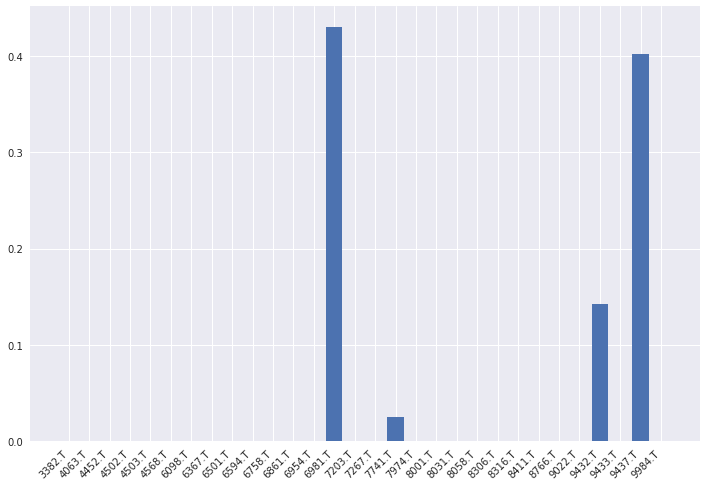

In [22]:
# Opt portfolio
plt.figure(figsize=(12,8))
plt.bar(df.columns, x_opt)
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
meanchg = df_retchg.mean().values
meanchg_opt = float(np.dot(meanchg, x_opt))

meancum = df_retcum.iloc[-1].values
meancum_opt = float(np.dot(meancum, x_opt))

varchg = df_retchg.var().values
varchg_opt = float(np.dot(varchg, x_opt ** 2))

varcum = df_retcum.var().values
varcum_opt = float(np.dot(varcum, x_opt ** 2))

print("opt portfolio\n=============")
print("mean chg :", meanchg_opt)
print("var chg  :", varchg_opt)
print("mean cum :", meancum_opt)
print("var cum  :", varcum_opt)

opt portfolio
mean chg : 0.010000000008337126
var chg  : 0.001790472054555012
mean cum : 1.5909490973715006
var cum  : 0.007284577501865901


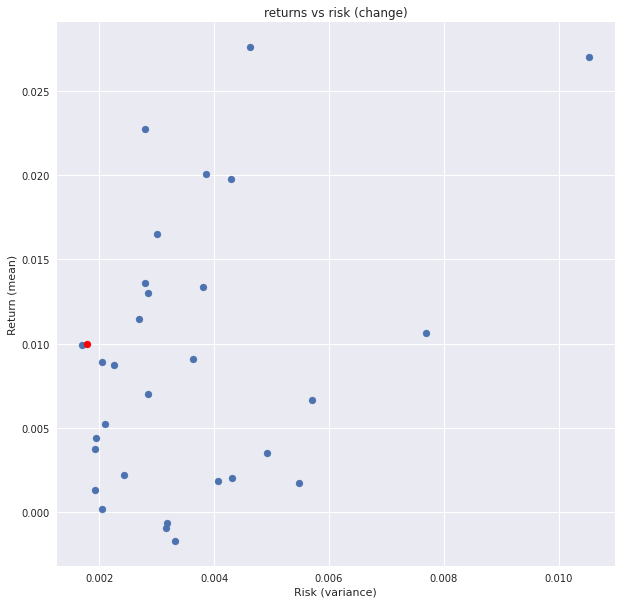

In [24]:
# returns vs risk (change)
plt.figure(figsize=(10,10))
plt.scatter(varchg, meanchg)
plt.scatter(varchg_opt, meanchg_opt, marker="o", color="red")
plt.title("returns vs risk (change)")
plt.xlabel("Risk (variance)")
plt.ylabel("Return (mean)")
plt.show()

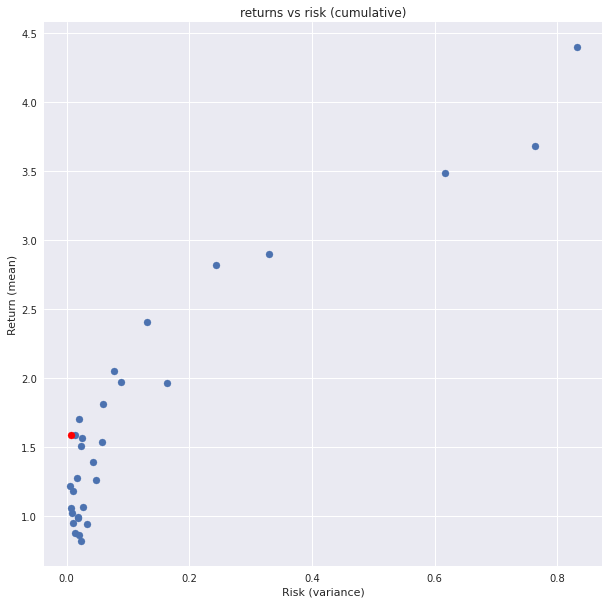

In [25]:
# returns vs risk (cumulative)
plt.figure(figsize=(10,10))
plt.scatter(varcum, meancum)
plt.scatter(varcum_opt, meancum_opt, marker="o", color="red")
plt.title("returns vs risk (cumulative)")
plt.xlabel("Risk (variance)")
plt.ylabel("Return (mean)")
plt.show()